### Метрики классификации.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/microsoft_malware_detection.csv")

In [79]:
pd.set_option("display.max_columns", None)   # показывать все колонки
pd.set_option("display.max_rows", None)      # показывать все строки
pd.set_option("display.max_colwidth", None)  # не обрезать текст внутри ячеек


In [80]:
data.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,Platform_windows2016,Platform_windows7,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,0.500248,17134,256,0.522569,0.531303,0.514613,1.0,0,0.0,137.0,0.481757,1.0,1.0,0.523297,2668.0,9124.0,4.0,5.0,2341.0,476940.0,0.508330,299451.0,0,4096.0,0.525667,18.9,1440.0,900.0,0.525853,4.294967e+09,0.564357,0.524112,17134,165,0.513553,0.513910,0.524273,26.0,119,0.497938,0,0.492479,0.0,0.501748,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0,0,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,0.500248,17134,256,0.522569,0.531303,0.514613,1.0,0,0.0,137.0,0.481757,1.0,1.0,0.503060,2668.0,91656.0,4.0,5.0,2405.0,476940.0,0.508330,102385.0,0,4096.0,0.501220,13.9,1366.0,768.0,0.502902,1.000000e+00,0.529205,0.524112,17134,1,0.513553,0.513910,0.522071,8.0,31,0.497938,0,0.492479,0.0,0.495390,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,0.500248,17134,768,0.522569,0.531303,0.492088,1.0,0,0.0,137.0,0.438313,1.0,1.0,0.523297,4909.0,317701.0,4.0,5.0,1972.0,114473.0,0.495242,113907.0,0,4096.0,0.525667,21.5,1920.0,1080.0,0.525853,4.294967e+09,0.564357,0.524112,17134,165,0.469357,0.469351,0.524273,7.0,30,0.517675,0,0.515559,0.0,0.501748,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,150323.0,27.0,126.0,124,0.500248,14393,768,0.462186,0.502994,0.492088,1.0,0,0.0,94.0,0.438313,1.0,1.0,0.503060,5682.0,338896.0,2.0,5.0,3381.0,305245.0,0.508330,290807.0,1,4096.0,0.501220,15.5,1366.0,768.0,0.502902,0.000000e+00,0.492216,0.463520,14393,0,0.469357,0.469351,0.477921,18.0,72,0.517675,0,0.492479,0.0,0.501748,512.0,63122.0,0,0.0,0,0,0.0,0.0,15.0,0,0,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,155006.0,27.0,205.0,172,0.500248,17134,256,0.522569,0.531303,0.514613,1.0,0,0.0,137.0,0.438313,1.0,1.0,0.503060,2206.0,240688.0,4.0,5.0,2836.0,305245.0,0.508330,303892.0,0,4096.0,0.501220,15.6,1920.0,1080.0,0.502902,0.000000e+00,0.469380,0.524112,17134,254,0.513553,0.513910,0.480763,27.0,120,0.517675,0,0.492479,0.0,0.501748,500.0,15510.0,0,0.0,0,0,0.0,0.0,15.0,0,0,0,1,0,0,0,0,1,0,0,0


In [81]:
data.shape

(119952, 79)

In [82]:
data.nunique()

EngineVersion                                           38
AppVersion                                              67
AvSigVersion                                           841
RtpStateBitfield                                         6
IsSxsPassiveMode                                         2
AVProductStatesIdentifier                             2638
AVProductsInstalled                                      5
AVProductsEnabled                                        5
HasTpm                                                   2
CountryIdentifier                                      222
CityIdentifier                                       17765
OrganizationIdentifier                                  37
GeoNameIdentifier                                      245
LocaleEnglishNameIdentifier                            196
OsVer                                                    8
OsBuild                                                 45
OsSuite                                                 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119952 entries, 0 to 119951
Data columns (total 79 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      119952 non-null  float64
 1   AppVersion                                         119952 non-null  float64
 2   AvSigVersion                                       119952 non-null  float64
 3   RtpStateBitfield                                   119952 non-null  float64
 4   IsSxsPassiveMode                                   119952 non-null  int64  
 5   AVProductStatesIdentifier                          119952 non-null  float64
 6   AVProductsInstalled                                119952 non-null  float64
 7   AVProductsEnabled                                  119952 non-null  float64
 8   HasTpm                                             119952 non-null  int64 

Перед вами пердобработанный датасет от Microsoft. столбец  `HasDetections` - ваш таргет. Который отражает по имеющимся данным, данная программа является вирусом или нет. Датасет имеет дисбаланс классов. Хороша ли метрика `accuracy`?

1. Проверьте пропорцию классов

In [ ]:
counts = data["HasDetections"].value_counts().sort_index()
perc = data["HasDetections"].value_counts(normalize=True).sort_index() * 100

report = pd.DataFrame({"count": counts, "percent": perc.round(2)})
print(report)

               count  percent
HasDetections                
0              99940    83.32
1              20012    16.68


2. Сделайте scaling данных

In [15]:
from sklearn.preprocessing import StandardScaler

X_num = data.drop(columns=["HasDetections"]).select_dtypes(include=["int64", "float64"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns, index=X_num.index)
X_scaled.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows7,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN
0,0.845336,0.590806,0.894582,0.164226,-0.143644,0.439021,-0.683969,-0.139524,0.113628,-1.253578,...,-0.104673,-0.147908,0.342549,-0.342351,-0.044116,-0.010411,-0.342017,0.359879,-0.158732,-0.046876
1,-0.682404,0.556517,-0.007421,0.164226,-0.143644,0.439021,-0.683969,-0.139524,0.113628,-0.236303,...,-0.104673,-0.147908,0.342549,-0.342351,-0.044116,-0.010411,-0.342017,-2.778713,6.299943,-0.046876
2,0.845336,0.590806,0.629433,0.164226,-0.143644,0.439021,-0.683969,-0.139524,0.113628,-0.347567,...,-0.104673,-0.147908,0.342549,-0.342351,-0.044116,-0.010411,-0.342017,0.359879,-0.158732,-0.046876
3,0.845336,0.590806,-0.022019,0.164226,-0.143644,0.439021,-0.683969,-0.139524,0.113628,-0.172723,...,-0.104673,-0.147908,0.342549,-0.342351,-0.044116,-0.010411,-0.342017,0.359879,-0.158732,-0.046876
4,-0.026048,0.590806,0.178062,0.164226,-0.143644,0.439021,-0.683969,-0.139524,0.113628,0.892238,...,-0.104673,-0.147908,0.342549,-0.342351,-0.044116,-0.010411,-0.342017,0.359879,-0.158732,-0.046876


Произведем процедуру отложенной выборки:

3. Создайте разделение на тренировочную и валидационную выборку, постройте модель Логистической регрессии, попробуйте настроить коэффициент регуляризации(С) с помощью `optuna`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import optuna

X = X_scaled
y = data["HasDetections"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


def objective(trial):
    C = trial.suggest_loguniform("C", 0.001, 100)
    model = LogisticRegression(C=C, max_iter=1000, solver="saga", n_jobs=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Лучшее C:", study.best_params["C"])
print("Лучшая accuracy:", study.best_value)

[I 2025-08-27 12:14:50,378] A new study created in memory with name: no-name-4b97cab5-5740-435f-9c27-0521683bc875
C:\Users\user\AppData\Local\Temp\ipykernel_1668\3111684810.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.001, 100)
[I 2025-08-27 12:14:58,721] Trial 0 finished with value: 0.8398149305989746 and parameters: {'C': 0.002462742680477772}. Best is trial 0 with value: 0.8398149305989746.
C:\Users\user\AppData\Local\Temp\ipykernel_1668\3111684810.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.001, 100)
[I 2025-08-27 12:15:17,608] Trial 1 finished with value: 0.8399399774915594 and

Лучшее C: 0.04671554682572065
Лучшая accuracy: 0.8399816597890876


In [17]:
best_model = LogisticRegression(
    C=study.best_params["C"], max_iter=1000, solver="saga", n_jobs=-1
)

best_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.04671554682572065
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


4.  Постройте __confusion matrix__ на тестовой выборки. Отобразите ее в виде DataFrame

|          | y_real = 1  | y_real = 0  |
|----------|------------|------------|
|  y_pred = 1  |     TP     |     FP     |
|  y_pred = 0  |     FN     |     TN     |  

Напоминаю:

* Positive/Negative отражает то, к какому классу определила объект наша модель, в нашем случае нулевой класс соответствует Negative (нет вируса), а единичный класс - Positive (есть вирус).

* True/False просто показывает совпало ли предсказание модели с реальным классом объекта, поэтому на главной диагонали стоят True, а на побочной False.

In [ ]:
y_pred = best_model.predict(X_valid)

TP = ((y_pred == 1) & (y_valid == 1)).sum()
FP = ((y_pred == 1) & (y_valid == 0)).sum()
FN = ((y_pred == 0) & (y_valid == 1)).sum()
TN = ((y_pred == 0) & (y_valid == 0)).sum()


cm = pd.DataFrame(
    [[TP, FP], [FN, TN]],
    index=["y_pred = 1", "y_pred = 0"],
    columns=["y_real = 1", "y_real = 0"],
)

cm

,y_real = 1,y_real = 0
y_pred = 1,411,247
y_pred = 0,3592,19741


5. Сравните результат с методом `confusion_matrix` в `sklearn.metrics`. Обратите внимание на тот факт, что в sklearn матрица транспонирована относительно нашей

In [23]:
from sklearn.metrics import confusion_matrix

cm_sklearn = confusion_matrix(y_valid, y_pred, labels=[1, 0])

cm_sklearn

array([[  411,  3592],
       [  247, 19741]])

In [ ]:
cm = confusion_matrix(y_valid, y_pred, labels=[1, 0])
cm_df = pd.DataFrame(
    cm, index=["y_real = 1", "y_real = 0"], columns=["y_pred = 1", "y_pred = 0"]
)
cm_df

,y_pred = 1,y_pred = 0
y_real = 1,411,3592
y_real = 0,247,19741


6. Посчитайте `accuracy`, `precision`, `recall`

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_valid, y_pred)
prec = precision_score(y_valid, y_pred)
rec = recall_score(y_valid, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")

Accuracy : 0.8400
Precision: 0.6246
Recall   : 0.1027


7. Какая метрика более точно описывает происходящее? Хороший ли результат мы получили

Рекол, результат плачевный :(
    
Программа пропускает почти все вирусы

8. Допустим, руководитель требует, чтобы наш классификатор в 60% случаев правильно предсказывал наличие вируса на компьютере, чтобы не беспокоить клиентов из-за ложноположительных результатов. \
Как решить эту задачу? =>
Надо подобрать порог, который максимизирует `recall` при условии, что `precision > 0.6`.

$$
(recall | precision > 0.6) \to \max_{thres}
$$

Для этого возможно построить так называемую `precision_recall_curve`, которая поможет нам посмотреть при разных трешхолдах соотношения этих двух метрик и вырать оптимальное

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba = best_model.predict_proba(X_valid)[:, 1]
### Строим всевозможные комбинации precision, recall, threshold

precision, recall, thres = precision_recall_curve(y_valid, y_proba)

### Находим такую тройку, при которой recall максимален, а precision > 0.6

ind = np.where(recall == recall[precision > 0.6].max())

print(f"Precison:\t {precision[ind][-1]}")
print(f"Recall: \t {recall[ind][-1]}")
print(f"Threshold:\t {thres[ind][-1]}")

Precison:	 0.6007702182284981
Recall: 	 0.11691231576317762
Threshold:	 0.47498569224113407


Теперь чтобы соответствовать установленным условиям, мы будем замерять вероятности для объектов и сравнивать и с найденным `Threshold`, который решает нашу задачу

9. На примере того, что сделано  решите задачу, где заказчик требует, чтобы наш классификатор находил хотя бы 20% компьютеров с вирусом, среди всех действительно зараженных компьютеров.
$$
(precision | recall > 0.2) \to \max_{thres}
$$

In [43]:
y_proba = best_model.predict_proba(X_valid)[:, 1]
precision, recall, thres = precision_recall_curve(y_valid, y_proba)

ind = np.where(precision == precision[recall > 0.2].max())

print(f"Precision:\t {precision[ind][-1]:.4f}")
print(f"Recall:\t\t {recall[ind][-1]:.4f}")
print(f"Threshold:\t {thres[ind][-1]:.4f}")

Precision:	 0.4664
Recall:		 0.2011
Threshold:	 0.3242


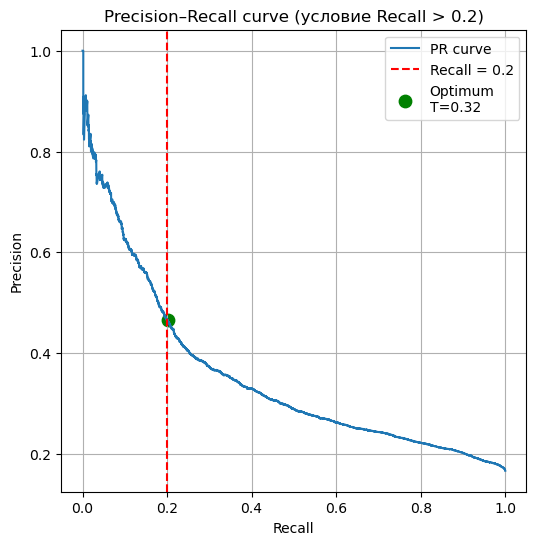

In [45]:
import matplotlib.pyplot as plt

best_p = precision[ind].item()
best_r = recall[ind].item()
best_t = thresholds[ind].item()

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label="PR curve")
plt.axvline(x=0.2, color="red", linestyle="--", label="Recall = 0.2")
plt.scatter(best_r, best_p, color="green", s=80, label=f"Optimum\nT={best_t:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall curve (условие Recall > 0.2)")
plt.legend()
plt.grid(True)
plt.show()

10. Одним из самых распространенных показателей качества является **F-мера**, которая обобщает все вышерассмотренные метрики. Более того, в ней можно регулировать параметр $\beta^2$, который отвечает за предпочтение между precision и recall. 
$$
F = \dfrac{(1 + \beta^2) P \cdot R}{\beta^2 P + R}
$$
* При $\beta^2 = 1$ и precision, и recall нам важны в равной степени.
* При $\beta^2 > 1$ предпочтение отдается recall. Похоже на решение задачи, где мы фиксируем приемлемое для нас значение precision и максимизируем recall.
* При $0 < \beta^2 < 1$ предпочтение отдается precision. Похоже на решение задачи, где мы фиксируем приемлемое для нас значение recall и максимизируем precision.

Найдите порог, который максимизирует:
1) F-меру с $\beta^2 = 1$,
2) F-меру с $\beta^2 = 0.05$,
3) F-меру с $\beta^2 = 4$.\
Для всех трех случаев выведите precision, recall, threshold и F-меру. 
Нарисуйте линии уровня и точку, которая максимизирует F-меру по аналогии с предыдущим пунктом.

In [64]:
precision, recall, thresholds = precision_recall_curve(y_valid, y_proba)

beta2 = 1
F = (1 + beta2) * (precision * recall) / (beta2 * precision + recall + 1e-9)

ind = np.nanargmax(F[:-1])
print(f"=== F-мера при β² = 1 ===")
print(f"Precision : {precision[ind]:.4f}")
print(f"Recall    : {recall[ind]:.4f}")
print(f"Threshold : {thresholds[ind]:.4f}")
print(f"F1-score  : {F[ind]:.4f}")

=== F-мера при β² = 1 ===
Precision : 0.2965
Recall    : 0.4859
Threshold : 0.2005
F1-score  : 0.3683


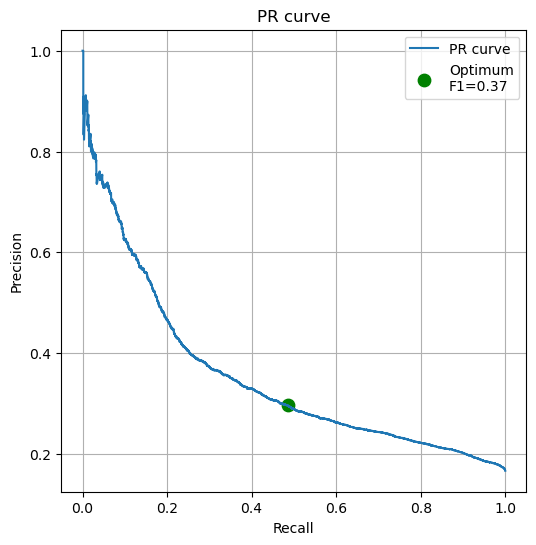

In [65]:
best_p, best_r, best_t, best_f = (
    precision[ind].item(),
    recall[ind].item(),
    thresholds[ind].item(),
    F[ind].item(),
)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label="PR curve")

plt.scatter(best_r, best_p, color="green", s=80, label=f"Optimum\nF1={best_f:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR curve")
plt.legend()
plt.grid(True)
plt.show()

In [66]:
beta2 = 0.05
F = (1 + beta2) * (precision * recall) / (beta2 * precision + recall + 1e-9)

ind = np.nanargmax(F[:-1])
print(f"=== F-мера при β² = 0.05 ===")
print(f"Precision : {precision[ind]:.4f}")
print(f"Recall    : {recall[ind]:.4f}")
print(f"Threshold : {thresholds[ind]:.4f}")
print(f"F_{np.sqrt(beta2):.2f}-score : {F[ind]:.4f}")

=== F-мера при β² = 0.05 ===
Precision : 0.6606
Recall    : 0.0914
Threshold : 0.5209
F_0.22-score : 0.5096


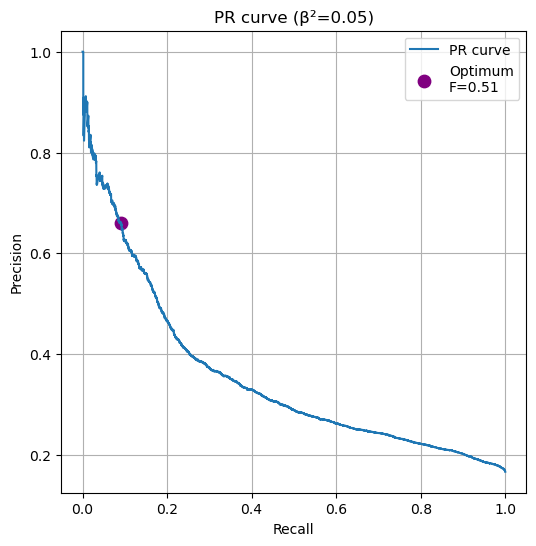

In [67]:
best_p, best_r, best_t, best_f = (
    precision[ind].item(),
    recall[ind].item(),
    thresholds[ind].item(),
    F[ind].item()
)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label="PR curve")

plt.scatter(best_r, best_p, color="purple", s=80, label=f"Optimum\nF={best_f:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR curve (β²=0.05)")
plt.legend()
plt.grid(True)
plt.show()

In [68]:
beta2 = 4
F = (1 + beta2) * (precision * recall) / (beta2 * precision + recall + 1e-9)

ind = np.nanargmax(F[:-1])
print(f"=== F-мера при β² = 4 ===")
print(f"Precision : {precision[ind]:.4f}")
print(f"Recall    : {recall[ind]:.4f}")
print(f"Threshold : {thresholds[ind]:.4f}")
print(f"F_{np.sqrt(beta2):.2f}-score : {F[ind]:.4f}")

=== F-мера при β² = 4 ===
Precision : 0.2092
Recall    : 0.8738
Threshold : 0.1061
F_2.00-score : 0.5344


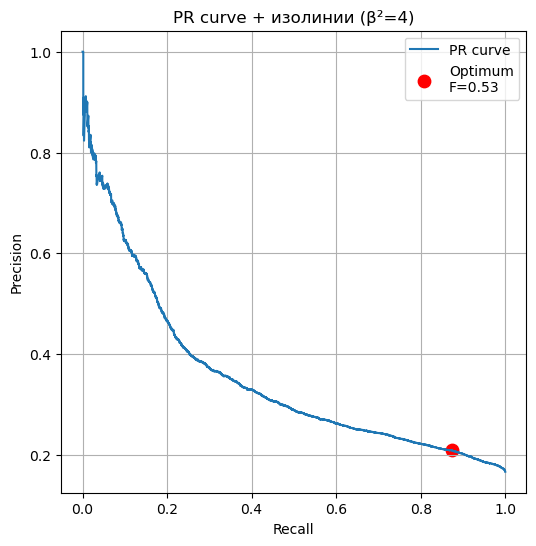

In [69]:
best_p, best_r, best_t, best_f = (
    precision[ind].item(),
    recall[ind].item(),
    thresholds[ind].item(),
    F[ind].item()
)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label="PR curve")
plt.scatter(best_r, best_p, color="red", s=80, label=f"Optimum\nF={best_f:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR curve + изолинии (β²=4)")
plt.legend()
plt.grid(True)
plt.show()

11. Постройте roc-auc.  
Пример описан снизу

ROC-AUC: 0.6927


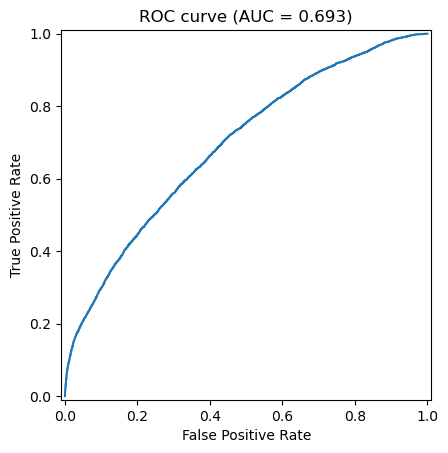

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_valid, y_proba)

roc_auc = roc_auc_score(y_valid, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title(f"ROC curve (AUC = {roc_auc:.3f})")
plt.show()
